随机森林的基评估器都拥有较低的偏差和较高的方差，因为决策树本身是预测比较”准“，是比较容易过拟合的
模型，装袋法本身也要求基分类器的准确率必须要有50%以上。所以以随机森林为代表的装袋法的训练过程旨在降
低方差，即降低模型复杂度，所以随机森林参数的默认设定都是假设模型本身在泛化误差最低点的右边。
所以，我们在降低复杂度的时候，本质其实是在降低随机森林的方差，**随机森林所有的参数，也都是朝着降低方差
的目标去**。有了这一层理解，我们对复杂度和泛化误差的理解就更上一层楼了，对于我们调参，也有了更大的帮
助。

本文在乳腺癌数据上进行一次随机森林的调参。乳腺癌数据是sklearn自带的分类数据之一。

## 1、导库

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## 2、导入数据集，探索数据

In [3]:
data = load_breast_cancer()

data

data.data.shape  # (569, 30)

data.target
#可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。过拟合的情况可能存在

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## 3、进行一次简单的建模，看看模型本身在数据集上的效果

In [4]:
rfc = RandomForestClassifier(n_estimators=100, random_state=50)
score_pre = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score_pre
#这里可以看到，随机森林在乳腺癌数据上的表现本就还不错，在现实数据集上，基本上不可能什么都不调就看到95%以上的准确率

0.9666666666666668

## 4、随机森林调整的第一步：无论如何先来调n_estimators

0.968421052631579 71


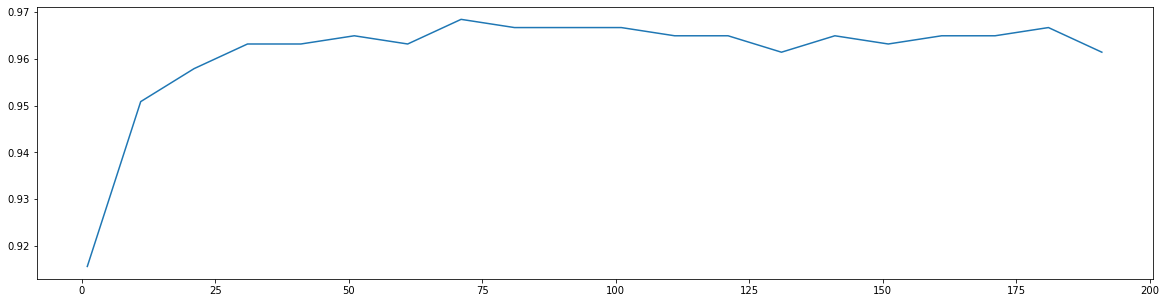

In [5]:
"""
在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势
我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何
引起模型整体准确率的变化
"""
scorel = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i + 1,
                                 n_jobs=-1,
                                 random_state=50)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)
print(max(scorel), (scorel.index(max(scorel)) * 10) + 1)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 201, 10), scorel)
plt.show()

## 5、在确定好的范围内，进一步细化学习曲线

0.968421052631579 66


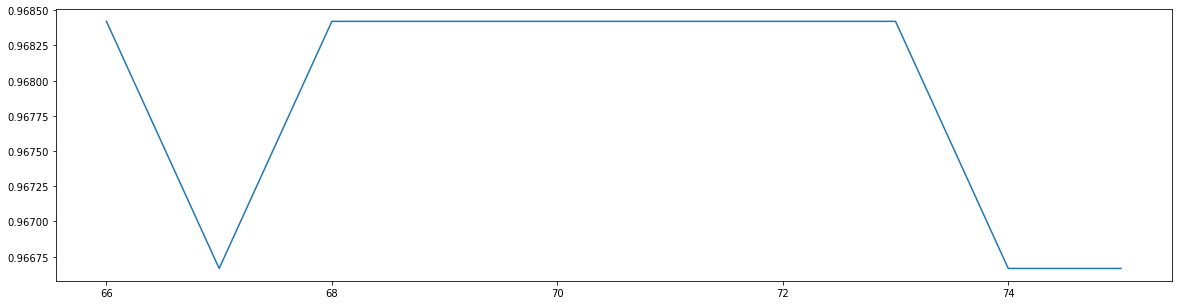

In [6]:
scorel = []
for i in range(66, 76):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=50)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)
print(max(scorel), ([*range(66, 76)][scorel.index(max(scorel))]))
plt.figure(figsize=[20, 5])
plt.plot(range(66, 76), scorel)
plt.show()

调整n_estimators的效果我跑出来的结果没啥变化，或许本来就很高了，或许因人而异。接下来就进入网格搜索，我们将使用网格搜索对
参数一个个进行调整。为什么我们不同时调整多个参数呢？原因有两个：1）同时调整多个参数会运行非常缓慢。2）同时调整多个参数，会让我们无法理解参数的组合是怎么得来的，所以即便网格搜索调出来的结果不好，我们也不知道从哪里去改。在这里，为了使用复杂度-泛化误差方法（方差-偏差方
法），我们对参数进行一个个地调整。

## 6、为网格搜索做准备，书写网格搜索的参数

In [7]:
"""
有一些参数是没有参照的，很难说清一个范围，这种情况下我们跟前面一样使用学习曲线，看趋势从曲线跑出的结果中选取一个更小的区间，再跑曲线。
param_grid = {'n_estimators':np.arange(0, 200, 10)}

param_grid = {'max_depth':np.arange(1, 20, 1)}

param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围

有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
样的参数我们就可以直接跑网格搜索
param_grid = {'criterion':['gini', 'entropy']}

param_grid = {'min_samples_split':np.arange(2, 22, 1)}

param_grid = {'min_samples_leaf':np.arange(1, 11, 1)}

param_grid = {'max_features':np.arange(5,30,1)}

"""

"\n有一些参数是没有参照的，很难说清一个范围，这种情况下我们跟前面一样使用学习曲线，看趋势从曲线跑出的结果中选取一个更小的区间，再跑曲线。\nparam_grid = {'n_estimators':np.arange(0, 200, 10)}\n\nparam_grid = {'max_depth':np.arange(1, 20, 1)}\n\nparam_grid = {'max_leaf_nodes':np.arange(25,50,1)}\n对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围\n\n有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这\n样的参数我们就可以直接跑网格搜索\nparam_grid = {'criterion':['gini', 'entropy']}\n\nparam_grid = {'min_samples_split':np.arange(2, 2+20, 1)}\n\nparam_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}\n\nparam_grid = {'max_features':np.arange(5,30,1)}\n\n"

## 7、开始按照参数对模型整体准确率的影响程度进行调参，首先调整max_depth

In [8]:
# 调整max_depth
param_grid = {'max_depth': np.arange(1, 20, 1)}
#   一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
#   但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
#   更应该画出学习曲线，来观察深度对模型的影响

rfc = RandomForestClassifier(n_estimators=66
                             , random_state=50
                             )
GS = GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(data.data, data.target)

GS.best_params_  # 6
GS.best_score_  # 0.9701754385964911

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=66, random_state=50),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

## 8、调整max_features

In [13]:
# 调整max_features
param_grid = {'max_features': np.arange(5, 31, 1)}  # 我们总共有30个特征
"""
max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
最小值。
"""
rfc = RandomForestClassifier(n_estimators=66
                             , random_state=50
                             )
GS = GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(data.data, data.target)

GS.best_params_  # 15
GS.best_score_  # 0.9701754385964911

{'max_features': 15}

## 9、调整min_samples_leaf

In [15]:
# 调整min_samples_leaf
param_grid = {'min_samples_leaf': np.arange(1, 11, 1)}
#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度
rfc = RandomForestClassifier(n_estimators=66
                             , random_state=50
                             )
GS = GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(data.data, data.target)

GS.best_params_  # 1
GS.best_score_  # 0.968421052631579

{'min_samples_leaf': 1}

可以看见，网格搜索返回了min_samples_leaf的最小值，并且模型整体的准确率还降低了。在这种情况下，我们显然是不要把这个参数设置起来的，就让它默认就好了。

## 10、不懈努力，继续尝试min_samples_split

In [17]:
#调整min_samples_split
param_grid = {'min_samples_split': np.arange(2, 22, 1)}
rfc = RandomForestClassifier(n_estimators=66
                             , random_state=50
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GS.best_params_  # 3
GS.best_score_  # 0.9701754385964912

{'min_samples_split': 3}

## 11、最后尝试一下criterion

In [19]:
#调整Criterion
param_grid = {'criterion': ['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=66
                             , random_state=50
                             )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(data.data, data.target)

GS.best_params_  # 'gini'
GS.best_score_  # 0.968421052631579

{'criterion': 'gini'}

## 12、调整完毕，总结出模型的最佳参数

In [26]:
rfc = RandomForestClassifier(n_estimators=66, random_state=50,min_samples_split=3)
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
print(score)
print(score-score_pre)

0.9701754385964912
0.0035087719298244613


在整个调参过程之中，我们首先调整了n_estimators（无论如何都请先走这一步），然后调整max_depth，通过
max_depth产生的结果，来判断模型位于复杂度-泛化误差图像的哪一边，从而选择我们应该调整的参数和调参的
方向。如果感到困惑，也可以画很多学习曲线来观察参数会如何影响我们的准确率，选取学习曲线中单调的部分来
放大研究（如同我们对n_estimators做的）。学习曲线的拐点也许就是我们一直在追求的，最佳复杂度对应的泛化
误差最低点（也是方差和偏差的平衡点）。
网格搜索也可以一起调整多个参数，只要有时间，可以自己跑一下，看看网格搜索会给我们怎样的结果，有时
候，它的结果比我们的好，有时候，我们手动调整的结果会比较好。当然了，乳腺癌数据集非常完美，
只调n_estimators参数就达到了随机森林在这个数据集上不错的表现